In [306]:
import numpy as np
import pandas as pd
import sklearn as sk
from random import *
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [307]:
def homeplay(pred,maximum):
    pl=0
    foreval=0
    budget=5000
    bet=100
    B=[]
    for i in range (len(pred)):
        if (maximum[i]>0.5 and special[['Bet365HomeWinOdds']].values[i]>=1.9 and pred[i]==1 and 
            special[['Bet365HomeWinOdds']].values[i]<=3):
        #if (pred[i]==0):
            pl=pl+1
            B.append(budget)
            if(y_test.values[i]==pred[i]):      
                foreval=foreval+1
                if (pred[i]==1):
                    budget=budget-bet+special[['Bet365HomeWinOdds']].values[i]*bet
                elif (pred[i]==0):
                    budget=budget-bet+special[['Bet365DrawOdds']].values[i]*bet
                else :
                    budget=budget-bet+special[['Bet365AwayWinOdds']].values[i]*bet
            else:
                budget=budget-bet          
    print "Matches which I bet:",pl
    print("------------------")

    print "Matches which I won:",foreval
    if (pl!=0):
        print "Ratio:",float(foreval)/pl

    print ('---------------------')
    print "Budget:",budget
    print ('---------------------')
    
    return(B)

In [322]:
def drawplay(pred,maximum):    
    pl=0
    foreval=0
    
    timesND=0
    budget2=5000
    bet=100
    B2=[]
    
    TimeToStop=5  #πότε θελουμε να σταματίσουμε .Το 1 είναι η 1η φορά που ποντάρουμε το bet το 2 ο 1ος διπλασιασμός

    for i in range (len(pred)):
        if (pred[i]==0):

            B2.append(budget2)
            if(y_test.values[i]==pred[i]):
                    foreval=foreval+1
                    if (pred[i]==1):
                        budget2=budget2-bet*(2**(timesND))+special[['Bet365HomeWinOdds']].values[i]*bet*(2**(timesND))
                    elif (pred[i]==0):
                        budget2=budget2-bet*(2**(timesND))+special[['Bet365DrawOdds']].values[i]*bet*(2**(timesND))
                    else :
                        budget2=budget2-bet*(2**(timesND))+special[['Bet365AwayWinOdds']].values[i]*bet*(2**(timesND))
                    timesND=0
    
            else:
                    budget2=budget2-bet*(2**(timesND))
                    if (timesND>=TimeToStop):
                        timesND=0
                        pl=pl+1
                    else:
                        timesND=timesND+1

    print "Times strike broke:",pl

    print ('---------------------')
    print "Budget:",budget2
    print ('---------------------')
    
    return (B2)

In [309]:
def clfstuff(clf1):
    #fit
    
    clf1.fit(x_train, y_train.values.ravel())  
    #calibrate
    
    clf = CalibratedClassifierCV(clf1, cv='prefit', method='sigmoid')
    clf.fit(x_train, y_train.values.ravel())
    
    #PREDICTION 
    pred=clf.predict(x_test) #What it predicts 
    pred2=clf.predict_proba(x_test) #Probabilities

    #PROBABILITIES
    maximum=[]
    for i in range (len(pred)):
        maximum.append(max(pred2[i]))
        
    return (pred,maximum)

In [310]:
def plotbud(B):    
    c=[]
    for i in range (len(B)):
        c.append(i)
    plt.figure(num=None, figsize=(9, 8), dpi=80, facecolor='w', edgecolor='r')
    plt.grid()
    plt.title('Budget')
    plt.plot(c , B , color="g",label="Training score")
    #plt.tight_layout()
    plt.show()  

In [311]:
#DATASET IMPORT
df=pd.read_csv('ExportTrainingWithoutMonths.csv',low_memory=False)
df=df.dropna (axis=0, how="any")

#HOW MANY 
print(df.shape)

test=pd.read_csv('FullTest.csv',low_memory=False)
test=test.dropna (axis=0, how="any")

print test.shape

for index,row in test.iterrows(): 
    if(row["Month"]==9.0 or row["Month"]==8.0 or row["Month"]==10.0 or row["Month"]==7.0 or row["Month"]==6.0
       or row["Month"]==11.0):
        row["Month"]=np.nan
        test.ix[index]=row
test=test.dropna (axis=0, how="any")
print test.shape

#Choose the features
x_train=df[["PureProbaHome","PureProbaAway",
               'RelativePointsDifference',
              'RelativeSumTeamGoals','RelativeEatSumTeamGoals']]
y_train=df[['FullTimeResultID']]

x_test=test[["PureProbaHome","PureProbaAway",
               'RelativePointsDifference',
              'RelativeSumTeamGoals','RelativeEatSumTeamGoals']]

y_test = test [['FullTimeResultID']]
maintrain=x_train
maintarget=y_train

(103850, 51)
(15536, 51)
(8452, 51)


In [312]:
#I ISOLATE SPECIAL BEFORE STANDARIZING
# special=df[60001:]
special=test
#STANDARIZING x_train,x_test
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [313]:
clf=LogisticRegression(C= 18.023543532866352, intercept_scaling = 6.367939200901632, solver= 'newton-cg',max_iter = 94644.0, penalty= 'l2', class_weight= None)
clf2 =DecisionTreeClassifier(min_weight_fraction_leaf= 0.10375200619153369, criterion = 'entropy', max_depth = 19.0, class_weight= None)
clf3 =RandomForestClassifier(oob_score=True,verbose=70.0, n_estimators= 15, min_weight_fraction_leaf= 0.0005073465668121592, criterion='gini', max_depth= 18.0, class_weight=None)
clf4 =KNeighborsClassifier(n_neighbors=41)


Accuracy: 0.509583530525
Matches which I bet: 327
------------------
Matches which I won: 182
Ratio: 0.556574923547
---------------------
Budget: [ 7596.]
---------------------


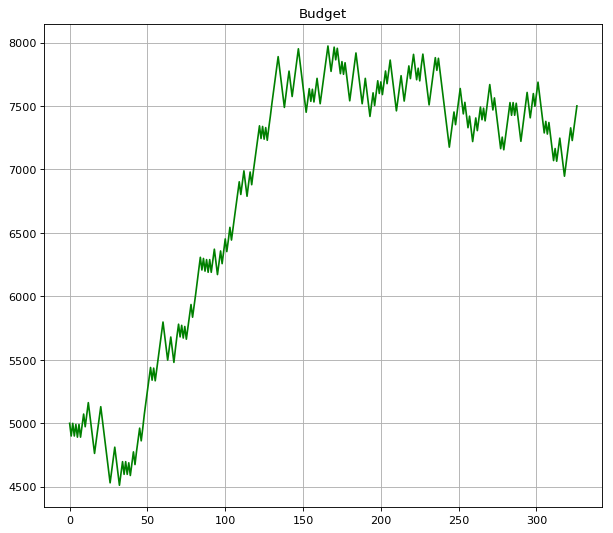

In [323]:
pred,maximum=clfstuff(clf)
print "Accuracy:",accuracy_score(y_test, pred)
B=homeplay(pred,maximum)
plotbud(B)

Times strike broke: 0
---------------------
Budget: [ 6834.]
---------------------


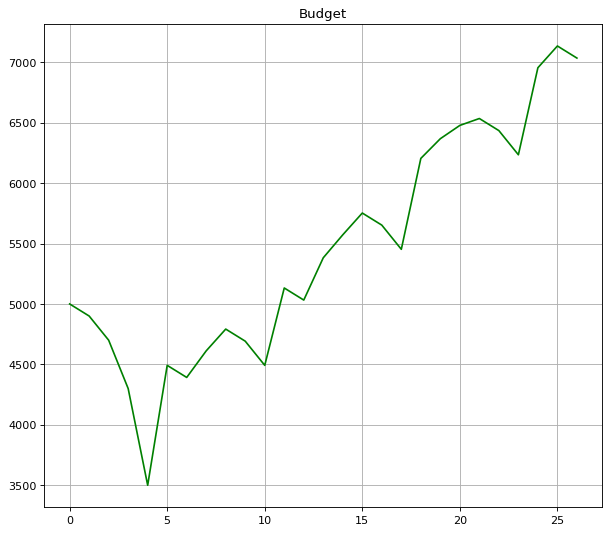

In [324]:
B1=drawplay(pred,maximum)
plotbud(B1)

Accuracy: 0.508991954567
Matches which I bet: 52
------------------
Matches which I won: 30
Ratio: 0.576923076923
---------------------
Budget: [ 5530.]
---------------------


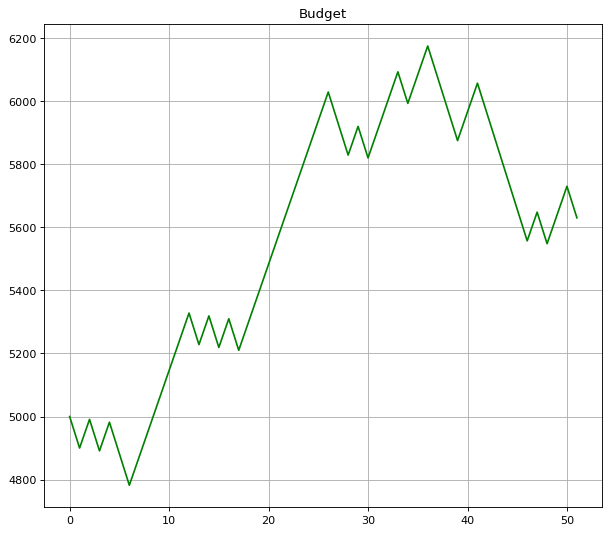

In [325]:
pred,maximum=clfstuff(clf2)
print "Accuracy:",accuracy_score(y_test, pred)
B=homeplay(pred,maximum)
plotbud(B)

Times strike broke: 0
---------------------
Budget: 5000
---------------------


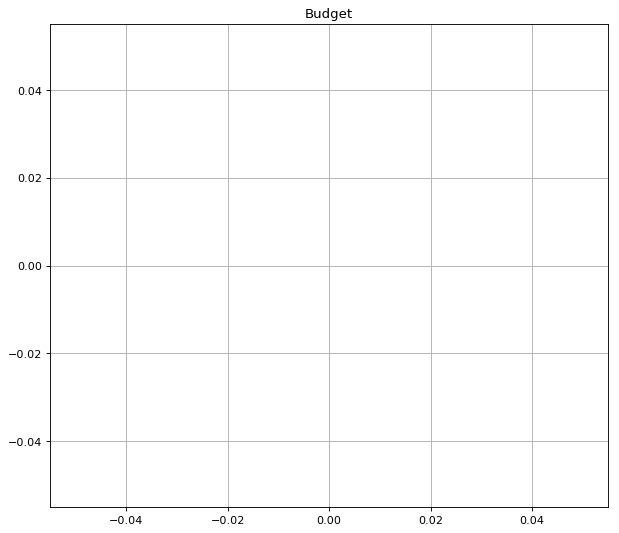

In [326]:
B1=drawplay(pred,maximum)
plotbud(B1)

building tree 1 of 15
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
building tree 2 of 15
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
building tree 3 of 15
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
building tree 4 of 15
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
building tree 5 of 15
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s
building tree 6 of 15
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.3s remaining:    0.0s
building tree 7 of 15
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.6s remaining:    0.0s
building tree 8 of 15
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.0s remaining:    0.0s
building tree 9 of 15
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.3s remaining:    0.0s
building tree 10 of 15
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.6

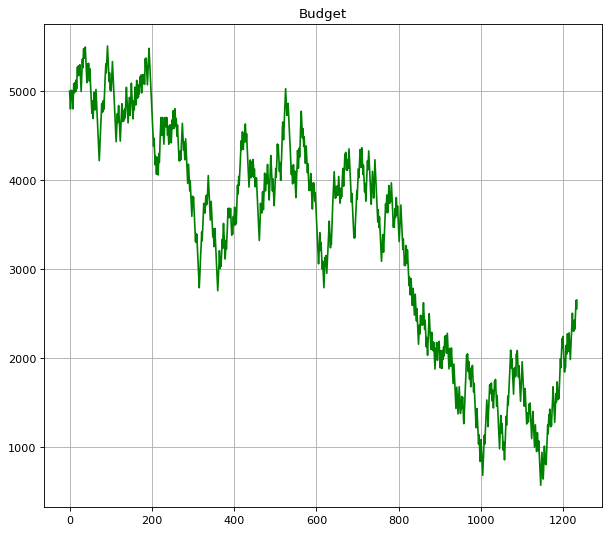

In [327]:
pred,maximum=clfstuff(clf3)
print "Accuracy:",accuracy_score(y_test, pred)
B=homeplay(pred,maximum)
plotbud(B)

Times strike broke: 77
---------------------
Budget: [-109331.]
---------------------


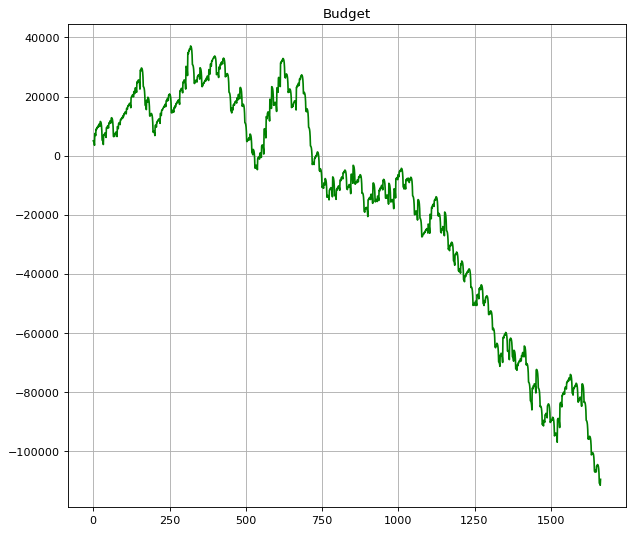

In [328]:
B1=drawplay(pred,maximum)
plotbud(B1)

Accuracy: 0.468646474207
Matches which I bet: 1228
------------------
Matches which I won: 582
Ratio: 0.473941368078
---------------------
Budget: [ 10262.]
---------------------


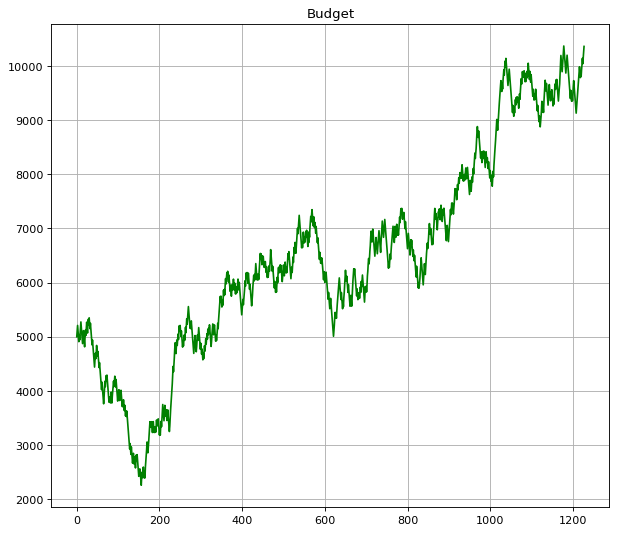

In [329]:
pred,maximum=clfstuff(clf4)
print "Accuracy:",accuracy_score(y_test, pred)
B=homeplay(pred,maximum)
plotbud(B)

Times strike broke: 59
---------------------
Budget: [-41076.]
---------------------


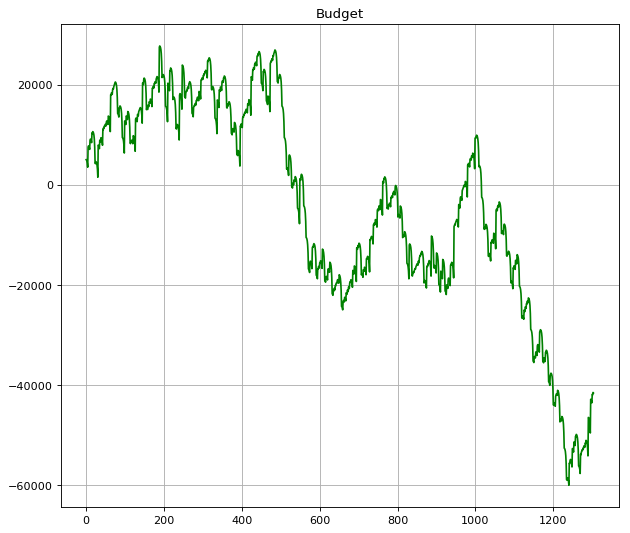

In [330]:
B1=drawplay(pred,maximum)
plotbud(B1)